# Sales Prediction

Importing Libraries

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


# Loading Dataset

In [8]:
sale=pd.read_csv('Advertising.csv')

In [9]:
sale.head(3)

,s_no,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


# Missing value

In [10]:
sale.isnull().sum()

s_no         0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

No missing Value Here

### Remove unwanted column

In [11]:
sale.drop(columns='s_no', inplace=True)

# Statistical Summary

In [12]:
sale.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Datatypes

In [13]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Correlation Analysis

In [14]:
corr = sale.corr()
print(corr)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


# Heat Map

<Axes: >

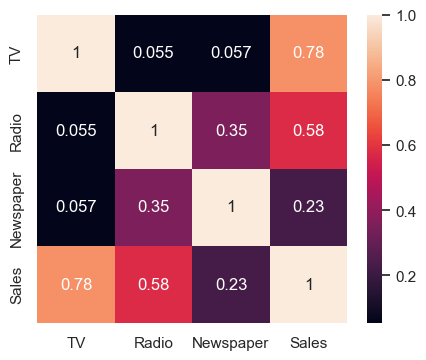

In [15]:
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)

# Distribution of numerical features

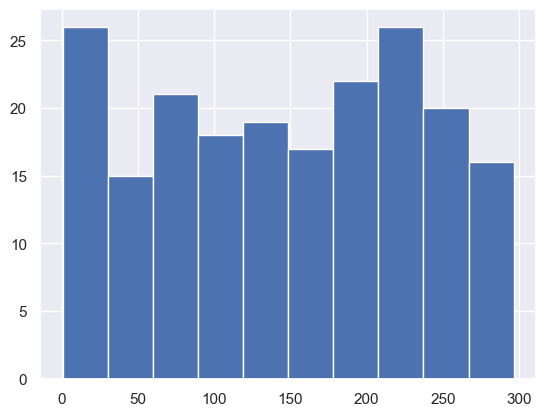

In [17]:
sale['TV'].hist()
plt.show()

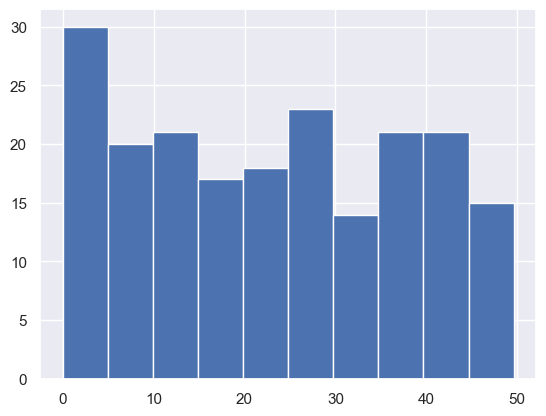

In [18]:
sale['Radio'].hist()
plt.show()

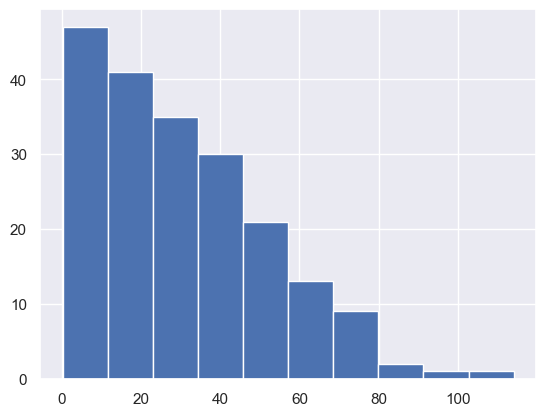

In [19]:
sale['Newspaper'].hist()
plt.show()

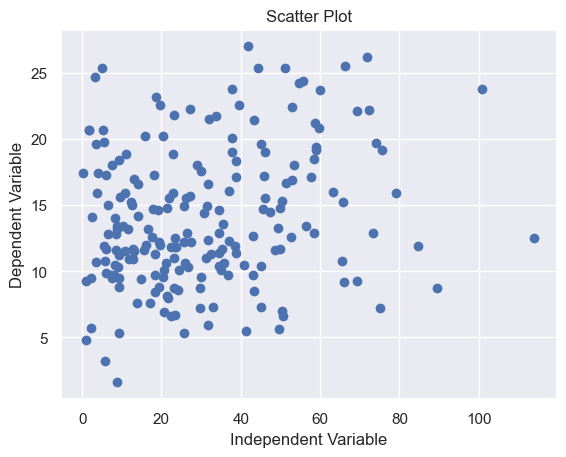

In [21]:
plt.scatter(sale['Newspaper'], sale['Sales'])

# Add labels and title
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Scatter Plot')

# Display plot
plt.show()

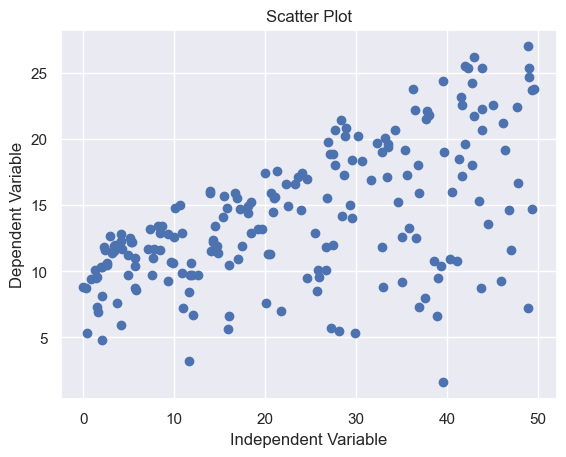

In [23]:
plt.scatter(sale['Radio'], sale['Sales'])

# Add labels and title
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Scatter Plot')

# Display plot
plt.show()

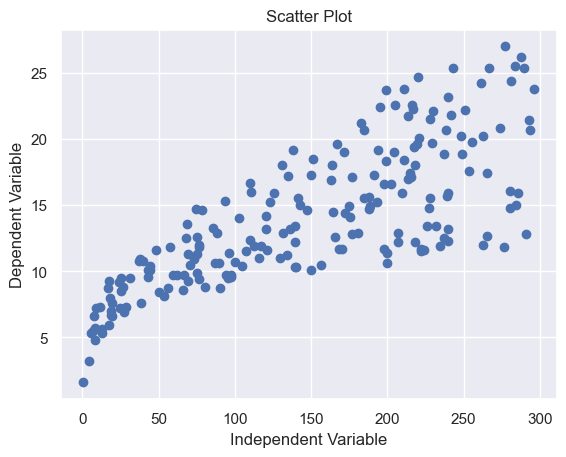

In [24]:
plt.scatter(sale['TV'], sale['Sales'])

# Add labels and title
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Scatter Plot')

# Display plot
plt.show()

# Splitting into independent and dependent variable

In [25]:
x=sale.drop(columns=['Sales'])
y=sale['Sales']

In [26]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [27]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Splitting into Train and Test

In [29]:
from sklearn.model_selection import train_test_split


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [32]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (160, 3)
x_test shape: (40, 3)
y_train shape: (160,)
y_test shape: (40,)


# Model Building`

In [52]:
from sklearn.linear_model import LinearRegression


In [54]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [55]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: 2.9388893694594085
Coefficient: [ 0.04576465  0.18853002 -0.00103749]


In [56]:
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
y_pred = model.predict(x_test)


In [58]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R^2):", r2)


Mean Squared Error (MSE): 3.0439325516617837
Root Mean Squared Error (RMSE): 1.7446869494731092
Coefficient of Determination (R^2): 0.9035619145344695


In [60]:
# Alternatively, you can calculate the R^2 score using the model's score() method
r2_alt = model.score(x_test, y_test)
print("R^2 (Alternate calculation):", r2_alt)

R^2 (Alternate calculation): 0.9035619145344695


R^2 close to 1: This indicates that the model explains a large proportion of the variance in the dependent variable, suggesting a strong relationship between the independent and dependent variables. It implies that the model's predictions are very close to the actual values.

R^2 close to 0: This suggests that the model does not explain much of the variance in the dependent variable, indicating a weak relationship between the independent and dependent variables. The model may not be capturing important factors influencing the dependent variable.